In [ ]:
# PASO 1: IMPORTAR LIBRERÍAS Y CARGAR EL DATASET 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_csv('dataset/dataset_Facebook.csv', delimiter=',')

print("--- Vista inicial del dataset ---")
print(dataset.head())
print("\n--- Información general y tipos de datos ---")
dataset.info()


--- Vista inicial del dataset ---
   Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
0            139441   Photo         2          12             4          3   
1            139441  Status         2          12             3         10   
2            139441   Photo         3          12             3          3   
3            139441   Photo         2          12             2         10   
4            139441   Photo         2          12             2          3   

   Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0   0.0                       2752                             5091   
1   0.0                      10460                            19057   
2   0.0                       2413                             4373   
3   1.0                      50128                            87991   
4   0.0                       7244                            13594   

   Lifetime Engaged Users  Lifetime Post Consumers  \
0               

In [ ]:
# PASO 2: LIMPIEZA Y PREPROCESAMIENTO DE DATOS
dataset.dropna(inplace=True)
dataset = pd.get_dummies(dataset, columns=['Type'], drop_first=True)

print("\n--- Dataset después de la limpieza y preprocesamiento ---")
print(dataset.head())



--- Dataset después de la limpieza y preprocesamiento ---
   Page total likes  Category  Post Month  Post Weekday  Post Hour  Paid  \
0            139441         2          12             4          3   0.0   
1            139441         2          12             3         10   0.0   
2            139441         3          12             3          3   0.0   
3            139441         2          12             2         10   1.0   
4            139441         2          12             2          3   0.0   

   Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0                       2752                             5091   
1                      10460                            19057   
2                       2413                             4373   
3                      50128                            87991   
4                       7244                            13594   

   Lifetime Engaged Users  Lifetime Post Consumers  ...  \
0                     178         

In [19]:
# PASO 3: SELECCIÓN DE VARIABLES (FEATURES Y TARGET)
y = dataset['Lifetime Post Total Reach']
X = dataset.drop(columns=['Lifetime Post Total Reach', 'like', 'share', 'comment'])

In [20]:
# PASO 4: DIVIDIR LOS DATOS EN ENTRENAMIENTO Y PRUEBA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nSe han dividido los datos:")
print(f" - {len(X_train)} filas para entrenamiento.")
print(f" - {len(X_test)} filas para prueba.")


Se han dividido los datos:
 - 396 filas para entrenamiento.
 - 99 filas para prueba.


In [21]:
# PASO 5: APLICAR EL MODELO DE REGRESIÓN LINEAL MÚLTIPLE
regresor = LinearRegression()
regresor.fit(X_train, y_train)

print("\n¡Modelo de Regresión Lineal Múltiple entrenado con éxito!")


¡Modelo de Regresión Lineal Múltiple entrenado con éxito!


In [22]:
# PASO 6: COMPROBAR Y EVALUAR EL MODELO
y_pred = regresor.predict(X_test)

print("\n--- Evaluación del Modelo ---")
print('Error Absoluto Medio (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coeficiente de Determinación (R^2):', metrics.r2_score(y_test, y_pred))



--- Evaluación del Modelo ---
Error Absoluto Medio (MAE): 3725.8996519347456
Error Cuadrático Medio (MSE): 76104871.13533574
Raíz del Error Cuadrático Medio (RMSE): 8723.81058570942
Coeficiente de Determinación (R^2): 0.857663815394873


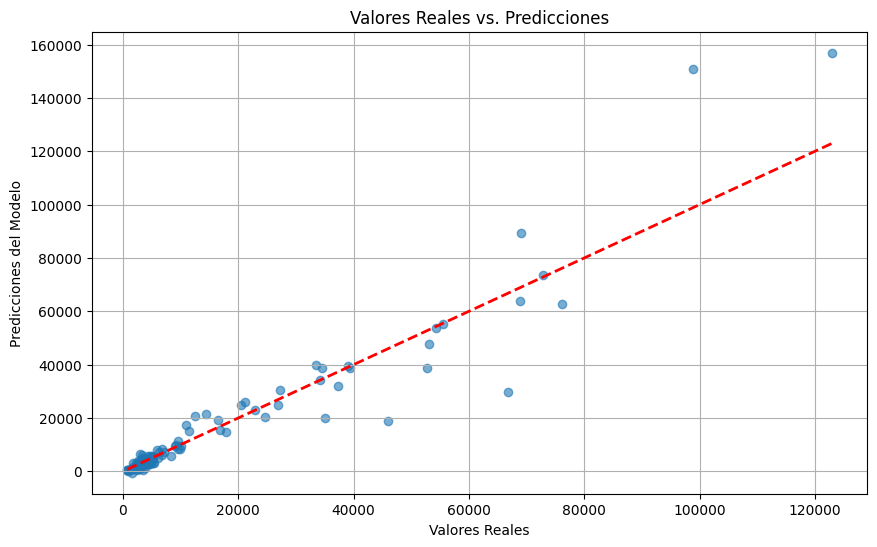

In [23]:
# PASO 7: VISUALIZACIÓN DE RESULTADOS
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.title('Valores Reales vs. Predicciones')
plt.grid(True)
plt.show()